# Step-by-Step Explanation of PCA

## Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

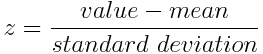

Once the standardization is done, all the variables will be transformed to the same scale.



## Step 2: Convariance Matrix Computation

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 data matrix of this from:

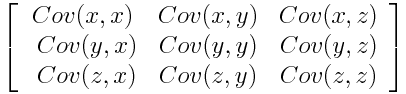

Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

**What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

It’s actually the sign of the covariance that matters:

- If positive then: the two variables increase or decrease together (correlated)
- If negative then: one increases when the other decreases (Inversely correlated)

Now that we know that the covariance matrix is not more than a table that summarizes the correlations between all the possible pairs of variables, let’s move to the next step.

## Step 3: Compute the Eigenvectors and Eigenvalues to identify Principal Components

Visual explanation here: https://setosa.io/ev/eigenvectors-and-eigenvalues/

**Eigenvectors** and **eigenvalues** are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. Before getting to the explanation of these concepts, let’s first understand what do we mean by principal components.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.

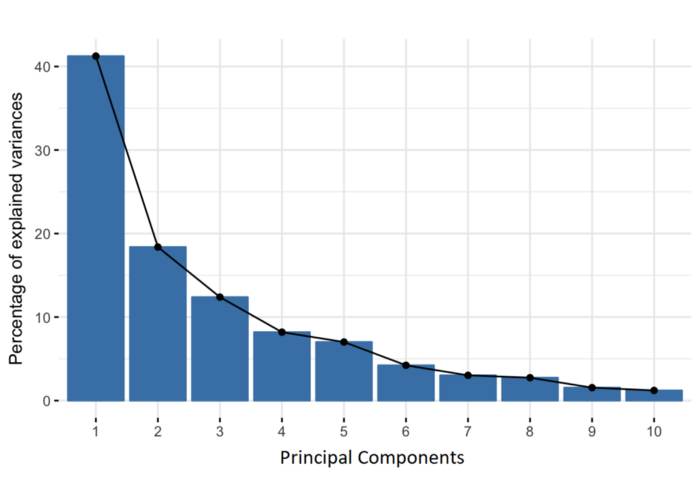

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a **maximal amount of variance**, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

### How PCA Constructs the Principal Components

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the **largest possible variance** in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component ? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).

![image.png](https://builtin.com/sites/www.builtin.com/files/inline-images/national/Principal%2520Component%2520Analysis%2520second%2520principal.gif)

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.

Now that we understand what we mean by principal components, let’s go back to eigenvectors and eigenvalues. What you first need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

Without further ado, it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

#### Principal Component Analysis Example:

Let’s suppose that our data set is 2-dimensional with 2 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:

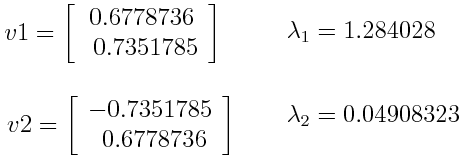

If we rank the eigenvalues in descending order, we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component (PC1) is v1 and the one that corresponds to the second principal component (PC2) isv2.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 96 percent and 4 percent of the variance of the data.

## Step 4: Feature vector
As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

#### Principal Component Analysis Example:

Continuing with the example from the previous step, we can either form a feature vector with both of the eigenvectors v1 and v2:

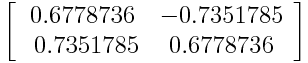

Or discard the eigenvector v2, which is the one of lesser significance, and form a feature vector with v1 only:

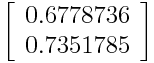

Discarding the eigenvector v2 will reduce dimensionality by 1, and will consequently cause a loss of information in the final data set. But given that v2 was carrying only 4 percent of the information, the loss will be therefore not important and we will still have 96 percent of the information that is carried by v1.

So, as we saw in the example, it’s up to you to choose whether to keep all the components or discard the ones of lesser significance, depending on what you are looking for. Because if you just want to describe your data in terms of new variables (principal components) that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.

## Step: Recast the data along the Principal Components axes

In the previous steps, apart from standardization, you do not make any changes on the data, you just select the principal components and form the feature vector, but the input data set remains always in terms of the original axes (i.e, in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.



_________________________________________________________________________

__THIS IS A VERY TECHNICAL EXPLANATION, FOR THOSE WHO WANT TO KNOW HOW SKLEARN CALCULATES PCA :)__ 

Please, refer to the other notebook for an use case application!